## Задание

Задание первого проекта состоит из 2 задач:
1. Создать модель для симуляции 3 скоррелированных между собой риск-факторов:
    - Мгновенная процентная ставка для валюты Рубль
    - Мгновенная процентная ставка для валюты Доллар США
    - Обменный курс Рубль-Доллар

Для симуляции процентных ставок использовать модель Кокса-Ингерсолла-Росса (CIR)

Для симуляции обменного курса использовать логарифмическую модель (будет дана на ближайшей лекции)

Симуляции провести для расчетной даты 10.12.2021

Необходимы комментарии
обоснования для выборов параметров моделей (волатильность, уровень среднего, скорость возврата к среднему и т.д.)

Выбор шага симуляции и количества симуляций обосновать (используя 2 задачу проекта)

Для симуляций могут быть выбраны с обоснованиями за дополнительный балл и другие симуляционные модели, основанные на стохдиффурах

2. На основании симуляций динамики обменного курса для пары рубль-долллар оценить справедливую стоимость для продукта Range Accrual
Для прайсинга необходимо создать отдельный модуль, который будет принимать на вход список параметров продукта:
    - Верхняя граница диапазона (или ее отсутствие)
    - Нижняя граница диапазона (или ее отсутствие)
    - Номинал сделки (максимальную выплату, доступную в случае нахождения внутри диапазона в течение всего срока жизни сделки)
    - Дата начала действия контракта
    - Дата окончания действия контракта

Модуль прайсинга вызывает модель симуляции процентных ставок и обменного курса и принимает обратно симуляции с началом в дату начала действия контракта (для простоты считаем, что расчеты проводим в динь заключения). В качестве результата выдаем справедливую стоимость дериватива

--------

Вопросы к лектору:
- обязательно ли это должны быть модульные вызовы или может быть в одном ноутбуке?
- для оценки параметров в трех моделях, обязательно ли использовать одинаковые даты? (скорее да, сам ответил)
- нужно ли дисконтировать купон? (нет не нужно, нашел ответ в записях с лекции)
- какая купонная ставка у нас? 100%?
- нужно ли делить ставку на кол-во дней?


## План работы:
### Задача 1 
1. ✅ Описать какие индексы/ставки беру и почему 
2. ✅ Загрузить данные по мнгновенным ставкам рубль, доллар, обменный курс. Проверить данные, собрать датасеты, с которыми далее буду работать.
3. ✅ Рассмотреть модели, с которыми буду работать, для каждой модели понять как буду оценивать параметры моделей, расписать
    - ✅ CIR - Cox–Ingersoll–Ross model
    - ✅ GBM - Лог нормальная FX-модель
4. ✅ Непосредственно расчитать параметры (✅ желательно в виде функций):
    - ✅ для мнгновенной ставки Рубль
    - ✅ для мнгновенной ставки Доллар
    - ✅ для обменного курса
5. Провести симмуляции для любого диапазона

Для симмуляций нужно сделать либо отдельный файл, либо отдельным блоком в ноутбуке. Но суть такая, создаю функции, которые:
1. ✅ Функция определяет важные параметры - волатильность, скорость возврата к среднему, уровень среднего:
    - на вход принимает:
        - три датафрейма данных
        - с какой даты начинаем валидировать k, sigma, theta (чтобы посмотреть на точность цены для разных наборов исторических данных)
        - до какой даты валидируем k, sigma, theta (чтобы посмотреть на точность цены для разных наборов исторических данных)
    - на выход отдает значения: k, sigma, theta
2. ✅ Функция непосредственно проводит симмуляции:
    - на вход принимает:
        - параметры k, sigma, theta
        - дату старта симмуляций
        - дата конца симмуляций
        - кол-во симмуляций
        - шаг симмуляции (кол-во временных шагов dt на один год)
        - seed - зерно, генератор случайных чисел NumPy, если True - будут одинаковые результаты при каждом запуске
    - на выход возвращает:
        - симмуляции для различных траекторий, можно в виде датафрейма, но это тяжело, можно для Numpy массивов где: (пример ответа ниже)
            - dates — одномерный массив дат (или список datetime)
            - r_rub[i, t] — ставка RUB для траектории i в момент времени dates[t]
            - fx[i, t] — курс для траектории i в момент времени dates[t]
        - Понятные массивы, первое измеренеи - путь, второе - время
        - для построения графиков, можно отдельно собрать датафреймы с несколькими траеткориями


**Выбор шага симуляции и количества симуляций обосновать:**
- ✅ Шаг симмуляции - по сути это dt в модели. для Range Accrual начисление идет по дням, поэтому логично выбрать 1 день => dt = 1/252 торговых дней
- ✅ Кол-во симмуляций. Для того, чтобы получить отпимальное кол-во симмуляций, можно провести эксперимент:
    - фиксируем модель, параметры, шаг по времени, воспроизводимость (seed)
    - посчитать цены (или значения FX) при разных кол-вах симмуляций. по этому выбрать оптимальное кол-во путем сравнивания изменения цены. чем больше симмуляций - тем выше точность цены, однако кол-во может вырасти так, что точность уже не будет менять. можно отобрать такое кол-во симмуляций, когда увеличение уже не будет изменять цену больше чем на 1-10%
    - тут важно что после симмуляций, нужно их среднее брать или около того, надо подробнее посмотреть

### Задача 2
1. Описать что такое Range Accural
2. Собрать функцию которая будет отдавать справедливую стоимость дериватива
3. Определить оптимальное кол-во симмуляций для цены (вдруг будет полезно)


-----------
## Задача 1.1

### Мнгновенная процентная ставка для валюты рубль - RUONIA

RUONIA (Ruble OverNight Index Average) — это эталонная процентная ставка в России, отражающая стоимость необеспеченных межбанковских кредитов на срок «овернайт». RUONIA показывает, «сколько стоят деньги-ликвидность» на российском межбанковском рынке именно сейчас. Ставка публикуется ежедневно и рассчитывается по сделкам, совершённым банками-участниками.

Срок: overnight ON - текущая стоимость денег

Источник: https://cbr.ru/hd_base/ruonia/ 

### Мгновенная процентная ставка для валюты Доллар США - SOFR
Ставка Secured Overnight Financing Rate (SOFR) — это широкий показатель стоимости привлечения денежных средств на одну ночь (overnight), обеспеченных казначейскими ценными бумагами США.
В расчёт SOFR включаются все сделки, входящие в Broad General Collateral Rate, а также двусторонние репо-сделки с казначейскими бумагами, клирингуемые через сервис Delivery-versus-Payment (DVP), предоставляемый Fixed Income Clearing Corporation (FICC). При этом данные фильтруются так, чтобы исключить часть сделок, относящихся к категории “specials”.

Примечание: specials — это репо под конкретную (специфическую) ценную бумагу. По таким сделкам ставка обычно ниже общей ставки репо для стандартного обеспечения (general collateral), потому что кредиторы денег готовы получить меньшую доходность, чтобы заполучить именно этот конкретный ценный актив.

SOFR рассчитывается как медиана, взвешенная по объёму, на основе данных о сделках tri-party repo, собираемых Банком Нью-Йорка Mellon, данных о сделках GCF Repo, а также данных о двусторонних репо с казначейскими бумагами, клирингуемых через FICC DVP (эти данные предоставляются Офисом финансовых исследований Министерства финансов США — OFR).

Каждый рабочий день Федеральный резервный банк Нью-Йорка публикует значение SOFR на своём сайте примерно в 8:00 утра по восточному времени (ET).

Срок: overnight ON - текущая стоимость денег

Источник: https://www.newyorkfed.org/markets/reference-rates/sofr

### Обменный курс Рубль-доллар
Тут кажется все понятно. Беру с сайта ЦБ - Базы данных по курсам валют

Источник: https://cbr.ru/currency_base/

### Примечание
Можно рассмотреть также и дургие ставки, например MIACR для рубля, EFFR, OBFR для доллара. Или же рассмотреть на другие сроки. Однако в первом приближении хочу сделать PIPELINE для симуляций и подсчета Range ACCrual, потом можно попробовать другие варианты

------------
## Задача 1.2

In [89]:
import pandas as pd
from scipy import stats
import numpy as np
import requests
import json
import time
import statsmodels.api as sm



In [171]:
ruonia_st = pd.read_excel('ruo_01_11_2019_T01_11_2022.xlsx')
sofr_st = pd.read_excel('sofr_01_11_2019_T01_11_2022.xlsx')
rub_usd_st = pd.read_excel('rub_usd_01_11_2019_T01_11_2022.xlsx')


/opt/anaconda3/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/opt/anaconda3/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [172]:
print('Записей по RUONIA: ', ruonia_st.shape[0])
print('Записей по SOFT: ', sofr_st.shape[0])
print('Записей по Обменному курсу: ', rub_usd_st.shape[0])

Записей по RUONIA:  732
Записей по SOFT:  750
Записей по Обменному курсу:  737


In [173]:
ruonia = ruonia_st[['DT', 'ruo']].copy()
ruonia

,DT,ruo
0,2022-11-01,7.60
1,2022-10-31,7.54
2,2022-10-28,7.64
3,2022-10-27,7.62
4,2022-10-26,7.65
...,...,...
727,2019-11-08,6.40
728,2019-11-07,6.42
729,2019-11-06,6.53
730,2019-11-05,6.27


In [174]:
sofr = sofr_st[['Effective Date','Rate (%)']].copy()
sofr

,Effective Date,Rate (%)
0,11/01/2022,3.05
1,10/31/2022,3.05
2,10/28/2022,3.05
3,10/27/2022,3.04
4,10/26/2022,3.03
...,...,...
745,11/07/2019,1.56
746,11/06/2019,1.57
747,11/05/2019,1.58
748,11/04/2019,1.56


In [175]:
rub_usd = rub_usd_st[['data', 'curs']].copy()
rub_usd

,data,curs
0,2022-11-01,61.6229
1,2022-10-29,61.5343
2,2022-10-28,61.3589
3,2022-10-27,61.4277
4,2022-10-26,61.3326
...,...,...
732,2019-11-08,63.7298
733,2019-11-07,63.5880
734,2019-11-06,63.2480
735,2019-11-02,64.0316


Заметим, что не смотря что везде я брал одинаковые даты, кол-во наблюдений разнится, но думаю не страшно, так как для оценки нам не важно сколько было до, данных и так много. Более того форматы не совпадают, будем исправлять. По хорошему надо в каждом df оставить только дату и значение.

In [176]:
ruonia.dtypes, sofr.dtypes, rub_usd.dtypes

(DT     datetime64[ns]
 ruo           float64
 dtype: object,
 Effective Date     object
 Rate (%)          float64
 dtype: object,
 data    datetime64[ns]
 curs           float64
 dtype: object)

In [ ]:
import pandas as pd

sofr['Effective Date ISO'] = pd.to_datetime(
    sofr['Effective Date'], 
    format='%m/%d/%Y'
)

sofr['Effective Date ISO'] = sofr['Effective Date ISO'].dt.strftime('%Y-%m-%d')
sofr

sofr['date'] = pd.to_datetime(sofr['Effective Date ISO'], format='%Y-%m-%d')

sofr = sofr[['date','Rate (%)']].copy()


In [178]:
sofr

,date,Rate (%)
0,2022-11-01,3.05
1,2022-10-31,3.05
2,2022-10-28,3.05
3,2022-10-27,3.04
4,2022-10-26,3.03
...,...,...
745,2019-11-07,1.56
746,2019-11-06,1.57
747,2019-11-05,1.58
748,2019-11-04,1.56


Приведем все датасеты к одному названию - дата date, и название ставки

In [ ]:
ruonia.columns = ['date', 'ruonia']
sofr.columns = ['date', 'sofr']
rub_usd.columns = ['date', 'rub_usd']

ruonia['date'] = ruonia['date'].dt.normalize()
sofr['date'] = sofr['date'].dt.normalize()
rub_usd['date'] = rub_usd['date'].dt.normalize()

ruonia.dtypes, sofr.dtypes, rub_usd.dtypes

(date      datetime64[ns]
 ruonia           float64
 dtype: object,
 date    datetime64[ns]
 sofr           float64
 dtype: object,
 date       datetime64[ns]
 rub_usd           float64
 dtype: object)

In [ ]:
set_rub = set(ruonia['date'])
set_usd = set(sofr['date'])
set_fx  = set(rub_usd['date'])

common_dates = set_rub & set_usd & set_fx

print("Совпадающих дат во всех трёх датафреймах:", len(common_dates))

Совпадающих дат во всех трёх датафреймах: 562


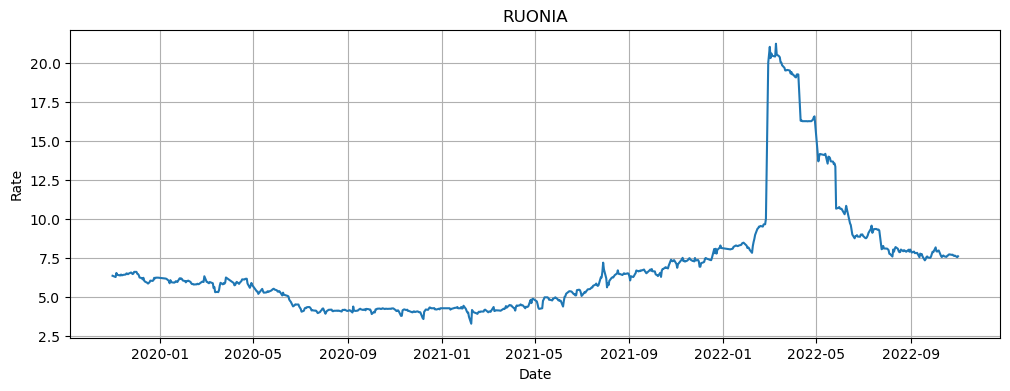

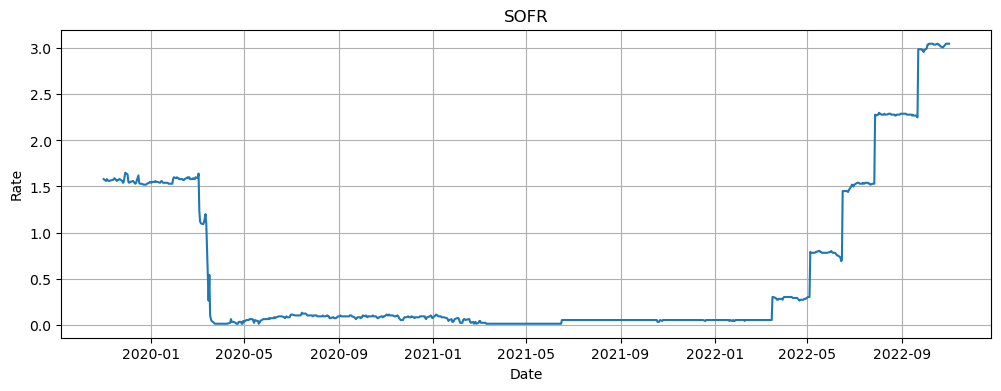

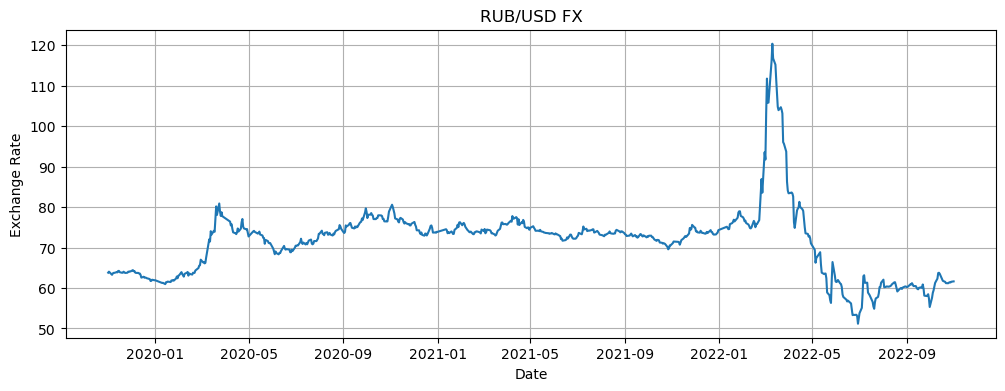

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(ruonia['date'], ruonia['ruonia'])
plt.title('RUONIA')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(sofr['date'], sofr['sofr'])
plt.title('SOFR')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(rub_usd['date'], rub_usd['rub_usd'])
plt.title('RUB/USD FX')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()


Самый стабильный период начиная с 2025-05-01

Ну просто для наглядности))

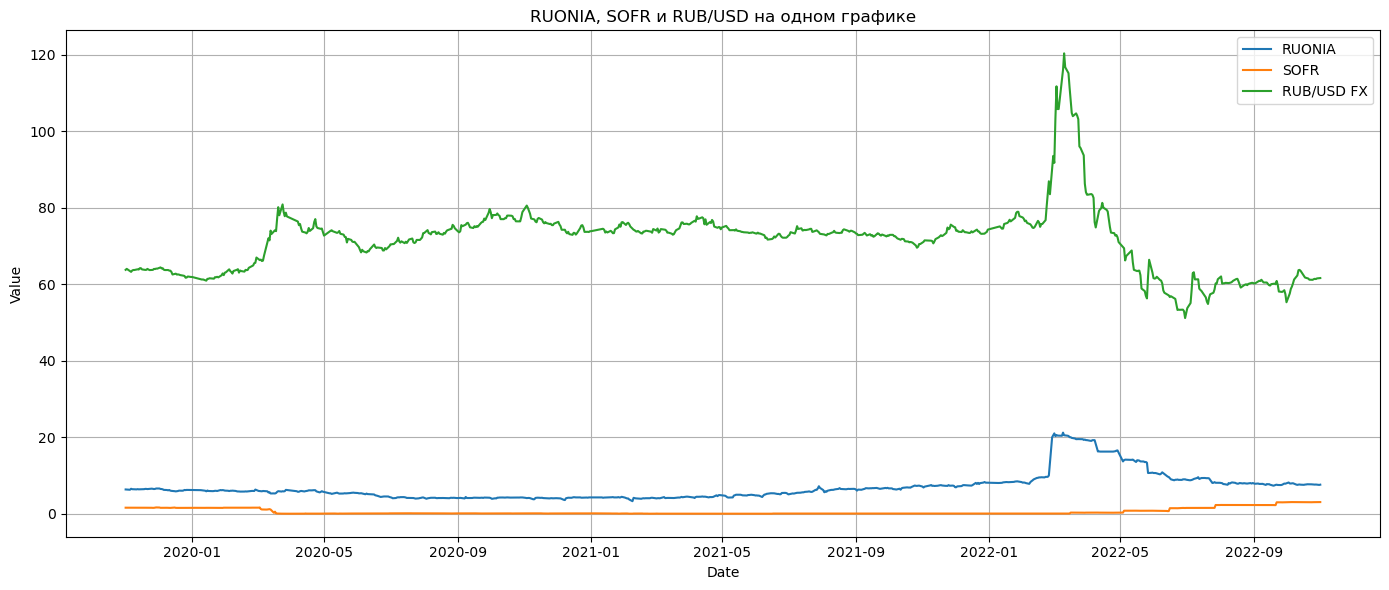

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Линии
plt.plot(ruonia['date'], ruonia['ruonia'], label='RUONIA')
plt.plot(sofr['date'],   sofr['sofr'],   label='SOFR')
plt.plot(rub_usd['date'], rub_usd['rub_usd'], label='RUB/USD FX')

# Настройки графика
plt.title('RUONIA, SOFR и RUB/USD на одном графике')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


--------------------------
## Задачи 1.3-1.4

### Рассмотрим модель Кокса-Ингерсолла-Росса (CIR)

взято с сайта: https://en.wikipedia.org/wiki/Cox%E2%80%93Ingersoll%E2%80%93Ross_model

Модель для мнгновенной ставки r_t выглядит так:
$$
dr_t = \kappa (\theta - r_t) dt + \sigma \sqrt{r_t} dW_t
$$

, где:
- κ - скорость возвратак к среднем;
- θ — долгосрочное среднее (уровень, вокруг которого ставка колеблется);
- σ — волатильность процесса (чем она больше, тем сильнее «дрожат» траектории).

Так как у нас есть дискретные исторические данные для ставок на каждый день, для калибровки параметров, необходимо использовать приближенную дискретизацию модели:
$$
r_{t+\Delta t} - r_t \approx \kappa(\theta - r_t) \Delta t + \sigma \sqrt{r_t} \sqrt{\Delta t} \epsilon_t, \space \space \epsilon_t \approx N(0,1)
$$

, тогда можем переписать так:

$$
\underbrace{\frac{r_{t+\Delta t} - r_t}{\Delta t}}_{y_t - \text{таргет}} = \kappa(\theta - r_t) + \underbrace{\sigma \sqrt{r_t} \frac{\epsilon_t}{\sqrt{\Delta t}}}_{\epsilon_t - \text{шум}}
$$

Видим линейную завимость, перепишем так, чтобы можно были применить МНК для поиска интересующих нас параметров:


$$
y_t \approx \alpha + \beta \cdot r_t + \epsilon_t 
$$

, где 
$$ 
\alpha = \kappa \cdot \theta, \space \space \beta = - \kappa
$$ 

Тогда по результатам регресси сможем сделать обратное преобразование:
$$ 
\hat{\kappa} = - \hat{\beta},
$$ 
$$
\hat{\theta} = - \frac{\hat{\alpha}}{\hat{\beta}}
$$

После того как мы оценили параметры kappa и theta, можно получить оценку волатильности sigma.

Сначала вычислим остатки регрессии. Пусть остатки обозначаются как:

$$ 
\hat{\varepsilon}^{(lin)}_t = y_t - \hat{\alpha} - \hat{\beta} r_t.
$$

Согласно модели CIR:

$$ 
\hat{\varepsilon}^{(lin)}_t \approx \sigma \sqrt{r_t}\,\frac{\varepsilon_t}{\sqrt{\Delta t}},\qquad \varepsilon_t \sim N(0,1).
$$

Тогда в квадрате:

$$ 
\left(\hat{\varepsilon}^{(lin)}_t\right)^2 \approx \frac{\sigma^2}{\Delta t}\, r_t \, \varepsilon_t^2.
$$

Так как математическое ожидание:

$$ 
\mathbb{E}[\varepsilon_t^2] = 1,
$$

то в среднем:

$$ 
\mathbb{E}\left[\left(\hat{\varepsilon}^{(lin)}_t\right)^2 \,\middle|\, r_t \right]\approx \frac{\sigma^2}{\Delta t}\, r_t.
$$

Отсюда возникает естественная регрессия:

$$ 
\left(\hat{\varepsilon}^{(lin)}_t\right)^2 = \gamma \, r_t + \text{шум},
$$

где:

$$ 
\gamma \approx \frac{\sigma^2}{\Delta t}.
$$

Следовательно, оценка волатильности:

$$ 
\hat{\sigma} = \sqrt{\gamma \, \Delta t}.
$$


---------------

#### val_params_cir

Напишем функцию которая определяет параметры для CIR - волатильность, скорость возврата к среднему, уровень среднего:
- на вход принимает:
    - датафрейма данных **обязательно**
    - название ставки **обязательно**
    - с какой даты начинаем валидировать k, sigma, theta (чтобы посмотреть на точность цены для разных наборов исторических данных)
    - до какой даты валидируем k, sigma, theta (чтобы посмотреть на точность цены для разных наборов исторических данных)
    - шаг по времени
    - размер сетки на графике
- на выход отдает значения: k, sigma, theta

In [ ]:
def val_params_cir(df,name = None, start_date='2019-11-01', end_date='2022-11-01', dt=1/252, size = None):
    if isinstance(start_date, str):
        start_date = pd.to_datetime(start_date)

    if isinstance(end_date, str):
        end_date = pd.to_datetime(end_date)
    df = df.sort_values(by=df.columns[0], ascending=True)
    df = df[(df.iloc[:, 0] >= start_date) & (df.iloc[:, 0] <= end_date)]
    
    df.iloc[:, 1] = df.iloc[:, 1] / 100.0 

    r_t = df.iloc[:-1, 1].values
    r_next = df.iloc[1:, 1].values

    y = (r_next - r_t) / dt

    X = sm.add_constant(r_t)
    model = sm.OLS(y, X).fit()
    alpha_hat, beta_hat = model.params

    kappa_hat = -beta_hat
    theta_hat = alpha_hat / kappa_hat

    eps_lin = model.resid  

    Z = r_t.reshape(-1, 1)
    gamma_hat = np.linalg.lstsq(Z, eps_lin**2, rcond=None)[0][0]

    sigma_hat = np.sqrt(gamma_hat * dt)
    r_0 = r_next[-1]

    y_pred = alpha_hat + beta_hat * r_t
    if size is not None:
        print("kappa =", kappa_hat)
        print("theta =", theta_hat)
        print("sigma =", sigma_hat)
        print("Последнее значение ставки =", round(r_0*100,2))

        plt.figure(figsize=(8, 5))
        plt.scatter(r_t, y, alpha=0.4, label="Данные")
        plt.plot(r_t, y_pred, linewidth=2, label="Регрессия")

        plt.xlabel("r_t")
        plt.ylabel("y_t")
        if size is not True:
            plt.ylim(-size, size)
        plt.title(f"Регрессия y_t на r_t для калибровки CIR на ставке {name}")
        plt.legend()
        plt.grid(True)
        plt.show()
    

    return kappa_hat, theta_hat, sigma_hat, r_0#, eps

kappa = 1.3685200998352145
theta = 0.056638870907339905
sigma = 0.0957346218310652
Последнее значение ставки = 7.49


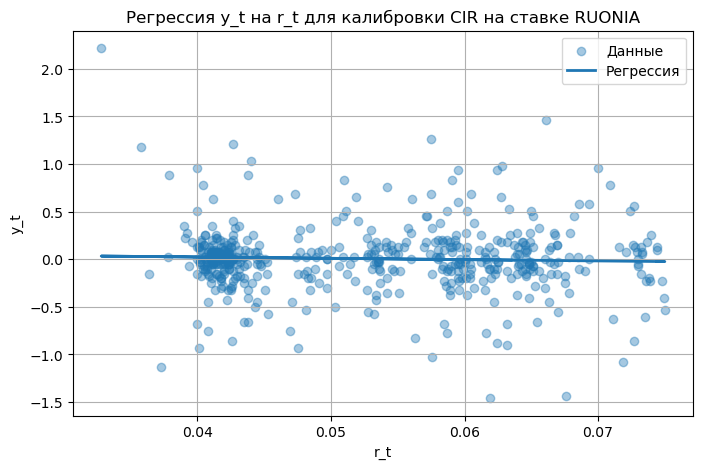

In [211]:
kappa_ruo, theta_ruo, sigma_ruo, r0_ruo = val_params_cir(ruonia, name='RUONIA', end_date='2021-12-09', size = True)

kappa = 9.64017900732294
theta = 0.000580169449466483
sigma = 0.049060465960905665
Последнее значение ставки = 0.05


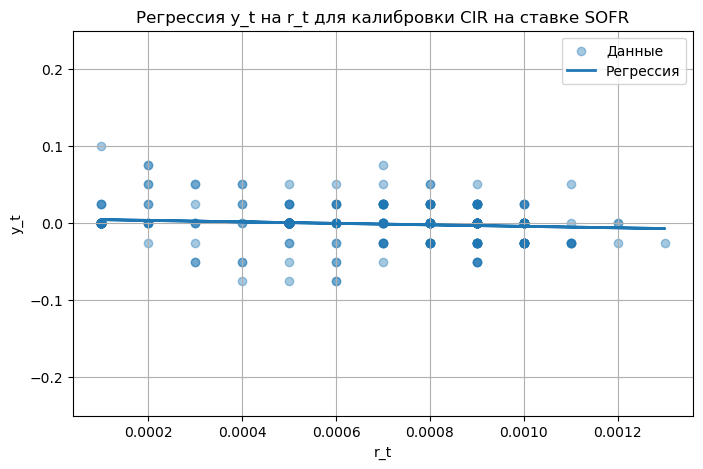

In [212]:
kappa_sofr, theta_sofr, sigma_sofr, r0_sofr = val_params_cir(sofr, name='SOFR', start_date='2020-05-01',end_date='2021-12-09', size = 0.25)


-------------

### Рассмотрим модель геометрического броуновского движения (GBM) - ЛогНормальная FX-модель

взято с сайта: https://en.wikipedia.org/wiki/Geometric_Brownian_motion

Стандартная логнормальная модель для FX (Обменный курс = S_t) обозначают так:

$$
\frac{dS_t}{S_t} = \mu\, dt + \sigma\, dW_t
$$

или эквивалентно:

$$
dS_t = \mu S_t\, dt + \sigma S_t\, dW_t
$$

, где 
- μ — drift (средний темп роста лог-курса)
- σ — волатильность FX.

Ее называют логарифмической моделью, потому что если обозначить:
$$
X_t = \ln{S_t}
$$

и найти значение выражения для $$ dX_t $$ используя лемму Ито: 


Для функции:

$$
X = f(S) = \ln S,
$$

лемма Ито даёт:

$$
df = f'(S)\, dS + \frac{1}{2} f''(S)\, (dS)^2.
$$



Производные:

$$
f'(S) = \frac{1}{S}, \qquad f''(S) = -\frac{1}{S^2}.
$$

Подставляя в формулу Ито:

$$
dX_t = \frac{1}{S_t} dS_t 
      + \frac{1}{2}\left(-\frac{1}{S_t^2}\right) (dS_t)^2.
$$

Далее подставляем в выражение выше исходное выражение для dS_t, получим:
$$
dX_t = \left( \mu - \frac{\sigma^2}{2} \right)\, dt + \sigma\, dW_t.
$$

**Итог:** логарифм курса X_t движется линейно, когда сам курс S_t движется логнормально. Путем несложного интегирования (которое я не буду показывать, а возьму итог) и возврату к изначальному значению курса S_t получается дискретное представление для данной формулы. Для нас необходимо именно дискретное представление для оценки параметров и как следствие симуляций.

$$
S_{t+\Delta t} =
S_t \cdot
\exp\left[
\left(\mu - \frac{\sigma^2}{2}\right)\Delta t +
\sigma \sqrt{\Delta t}\, Z_t
\right],
\qquad Z_t \sim \mathcal{N}(0,1).
$$

**Оценка параметров:**

Так как мы хотим оценивать стоимость продукта Range Accrual, то дрифт нам нужно оценивать не на исторических данных, а жестко задачать ставками, а так как обменный курс у нас RUB за 1 USD, то:
$$
\mu(t) = r_{\text{RUB}}(t) - r_{\text{USD}}(t)
$$

Волатильность FX \(\sigma\) оценивается через лог-доходности.


$$
r^{FX}_t = \ln\frac{S_{t+1}}{S_t}.
$$


$$
s^2 = \mathrm{Var}\left(r^{FX}_t\right).
$$


Для логнормальной модели:

$$
s^2 = \sigma^2 \Delta t.
$$


$$
\hat{\sigma} =
\sqrt{
\frac{
s^2
}{
\Delta t
}
}.
$$



#### val_params_fx

Напишем функцию которая определяет параметры для FX - волатильность:
- на вход принимает:
    - датафрейма данных **обязательно**
    - с какой даты начинаем валидировать k, sigma, theta (чтобы посмотреть на точность цены для разных наборов исторических данных)
    - до какой даты валидируем k, sigma, theta (чтобы посмотреть на точность цены для разных наборов исторических данных)
    - шаг по времени
- на выход отдает значения: sigma

In [ ]:
def val_params_fx(df, start_date='2019-11-01', end_date='2022-11-01', dt=1/252, size = None):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    df = df.sort_values(by=df.columns[0], ascending=True)
    df = df[(df.iloc[:, 0] >= start_date) & (df.iloc[:, 0] <= end_date)]

    S_t = df.iloc[:-1, 1].values
    S_next = df.iloc[1:, 1].values

    log_returns = np.log(S_next/ S_t)

    var_r = log_returns.var(ddof=1)  

    sigma_hat = np.sqrt(var_r / dt)
    S_0 = S_next[-1]

    if size is not None:
        print("Оценка годовой волатильности σ_FX:", sigma_hat)
        print("Последнее значение курса:", S_0)


    return sigma_hat, S_0

In [372]:
sigma_rub_usd, S_0 = val_params_fx(rub_usd, start_date='2020-05-01',end_date='2021-12-09', size = True)

Оценка годовой волатильности σ_FX: 0.11148169667230158
Последнее значение курса: 73.8453


### Коррелированность посредством ошибок из моделей выше

In [ ]:
def eps_for_rho(rub, usd, fx, sigma_FX=None,
           start_date='2019-11-01', end_date='2022-11-01',
           dt=1/252):

    kappa_ruo, theta_ruo, sigma_ruo, r0_ruo= val_params_cir(rub)
    kappa_sofr, theta_sofr, sigma_sofr, r0_sofr = val_params_cir(usd)
    
    if sigma_FX is None:
        sigma_FX = val_params_fx(fx, start_date, end_date)[0]

    if isinstance(start_date, str):
        start_date = pd.to_datetime(start_date)

    if isinstance(end_date, str):
        end_date = pd.to_datetime(end_date)

    rub_ = rub.copy()
    rub_ = rub_.sort_values(by=rub_.columns[0])
    rub_ = rub_[(rub_.iloc[:, 0] >= start_date) & (rub_.iloc[:, 0] <= end_date)]
    rub_ = rub_.iloc[:, :2]
    rub_.columns = ['date', 'rub']

    usd_ = usd.copy()
    usd_ = usd_.sort_values(by=usd_.columns[0])
    usd_ = usd_[(usd_.iloc[:, 0] >= start_date) & (usd_.iloc[:, 0] <= end_date)]
    usd_ = usd_.iloc[:, :2]
    usd_.columns = ['date', 'usd']

    fx_ = fx.copy()
    fx_ = fx_.sort_values(by=fx_.columns[0])
    fx_ = fx_[(fx_.iloc[:, 0] >= start_date) & (fx_.iloc[:, 0] <= end_date)]
    fx_ = fx_.iloc[:, :2]
    fx_.columns = ['date', 'fx']

    merged = rub_.merge(usd_, on='date', how='inner').merge(fx_, on='date', how='inner')
    merged = merged.sort_values('date').reset_index(drop=True)

    n_common = len(merged)
    if n_common < 2:
        raise ValueError(f"Слишком мало общих дат ({n_common}), нужно хотя бы 2 для расчёта шоков.")

    # print(f"Совпало {n_common} дат во всех трёх рядах.")
    # print(f"Для шоков FX будет использовано {n_common - 1} шагов (n-1).")

    S = merged['fx'].values
    r_R = merged['rub'].values
    r_U = merged['usd'].values

    S_t = S[:-1]
    S_next = S[1:]
    log_returns = np.log(S_next / S_t)

    r_R_t = r_R[:-1]
    r_U_t = r_U[:-1]

    r_R_next = r_R[1:]
    r_U_next = r_U[1:]

    eps_rub = (r_R_next - r_R_t - kappa_ruo*(theta_ruo - r_R_t)*dt)/ (sigma_ruo * np.sqrt(r_R_t) * np.sqrt(dt)) 
    eps_usd = (r_U_next - r_U_t - kappa_sofr*(theta_sofr - r_U_t)*dt)/ (sigma_sofr * np.sqrt(r_U_t) * np.sqrt(dt)) 
    
    eps_fx = (
        log_returns - (r_R_t - r_U_t - 0.5 * sigma_FX**2) * dt
    ) / (sigma_FX * np.sqrt(dt))

    rho_RU  = np.corrcoef(eps_rub,  eps_usd)[0, 1]
    rho_RFX = np.corrcoef(eps_rub,  eps_fx)[0, 1]
    rho_UFX = np.corrcoef(eps_usd,  eps_fx)[0, 1]

    return rho_RU, rho_RFX, rho_UFX


In [373]:
rho_RU, rho_RFX, rho_UFX  = eps_for_rho(ruonia,sofr,rub_usd, start_date='2020-05-01', end_date='2021-12-09')

In [374]:
rho_RU, rho_RFX, rho_UFX 

(np.float64(0.036276970419601165),
 np.float64(-0.02951894341620901),
 np.float64(-0.04507648173405611))

-----------
## Задача 1.5

### simulate_triple_model_by_dates

Напишем функцию непосредственно проводит симмуляции:
- на вход принимает:
    - дату старта симмуляций
    - дата конца симмуляций
    - либо:
        - датасеты ставок для рубля, доллара, обменного курса
            - тогда и даты для определения коэфициентов
        - параметры k, sigma, theta
    - кол-во симмуляций
    - шаг симмуляции (кол-во временных шагов dt на один год)
    - seed - зерно, генератор случайных чисел NumPy, если True - будут одинаковые результаты при каждом запуске
- на выход возвращает:
    - симмуляции для различных траекторий, можно в виде датафрейма, но это тяжело, можно для Numpy массивов где: (пример ответа ниже)
        - dates — одномерный массив дат (или список datetime)
        - r_rub[i, t] — ставка RUB для траектории i в момент времени dates[t]
        - fx[i, t] — курс для траектории i в момент времени dates[t]
    - Понятные массивы, первое измеренеи - путь, второе - время
    - для построения графиков, можно отдельно собрать датафреймы с несколькими траеткориями

Для симмуляций будем использовать

In [ ]:
def simulate_triple_model_by_dates(
    start_date,
    end_date,
    rub = None, usd = None, fx = None,
    start_date_for_val = None, end_date_for_val = None,
    kappa_R = None, theta_R= None, sigma_R= None, r0_R= None,
    kappa_U= None, theta_U= None, sigma_U= None, r0_U= None,
    sigma_FX= None, S0= None,
    rho_RU= None, rho_RFX= None, rho_UFX= None,
    n_paths=1000,
    dt = 1/252,
    seed=None
):
    if kappa_R is None and kappa_U is None and sigma_FX is None:
        kappa_R, theta_R, sigma_R, r0_R = val_params_cir(rub, start_date= start_date_for_val, end_date= end_date_for_val)
        kappa_U, theta_U, sigma_U, r0_U = val_params_cir(usd, start_date= start_date_for_val, end_date= end_date_for_val)
        sigma_FX, S0 = val_params_fx(fx, start_date= start_date_for_val, end_date= end_date_for_val) ## где-то тут ошибка, пока не могу понять где.....

    if rho_RU is None and rho_RFX is None and rho_UFX is None:
        rho_RU, rho_RFX, rho_UFX  = eps_for_rho(rub,usd,fx, start_date= start_date_for_val, end_date= end_date_for_val)


    if seed is not None:
        np.random.seed(seed)

    if isinstance(start_date, str):
        start_date = pd.to_datetime(start_date)

    if isinstance(end_date, str):
        end_date = pd.to_datetime(end_date)

    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    n_steps = len(dates) - 1
    days = n_steps


    sqrt_dt = np.sqrt(dt)

    Sigma_rho = np.array([
        [1.0,      rho_RU,   rho_RFX],
        [rho_RU,   1.0,      rho_UFX],
        [rho_RFX,  rho_UFX,  1.0    ]
    ])

    L = np.linalg.cholesky(Sigma_rho)

    r_R_paths = np.zeros((n_steps + 1, n_paths))
    r_U_paths = np.zeros((n_steps + 1, n_paths))
    S_paths   = np.zeros((n_steps + 1, n_paths))

    r_R_paths[0, :] = r0_R
    r_U_paths[0, :] = r0_U
    S_paths[0, :]   = S0

    for n in range(n_steps):
        r_R_n = r_R_paths[n]
        r_U_n = r_U_paths[n]
        S_n   = S_paths[n]

        Z = np.random.randn(3, n_paths)

        eps = L @ Z
        eps_R, eps_U, eps_FX = eps

        r_R_next = (
            r_R_n
            + kappa_R * (theta_R - r_R_n) * dt
            + sigma_R * np.sqrt(np.maximum(r_R_n, 0)) * sqrt_dt * eps_R
        )
        r_R_next = np.maximum(r_R_next, 0)

        r_U_next = (
            r_U_n
            + kappa_U * (theta_U - r_U_n) * dt
            + sigma_U * np.sqrt(np.maximum(r_U_n, 0)) * sqrt_dt * eps_U
        )
        r_U_next = np.maximum(r_U_next, 0)

        drift = (r_R_n - r_U_n - 0.5 * sigma_FX**2) * dt
        diff  = sigma_FX * sqrt_dt * eps_FX
        S_next = S_n * np.exp(drift + diff)

        r_R_paths[n+1] = r_R_next
        r_U_paths[n+1] = r_U_next
        S_paths[n+1]   = S_next

    return dates, r_R_paths, r_U_paths, S_paths


kappa = 0.5825291408077138
theta = 0.07356539703202236
sigma = 0.10075514730902156
Последнее значение ставки = 7.49


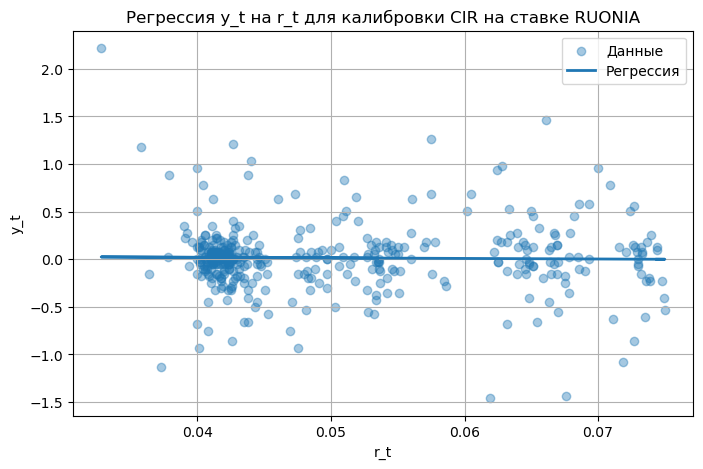

kappa = 9.64017900732294
theta = 0.000580169449466483
sigma = 0.049060465960905665
Последнее значение ставки = 0.05


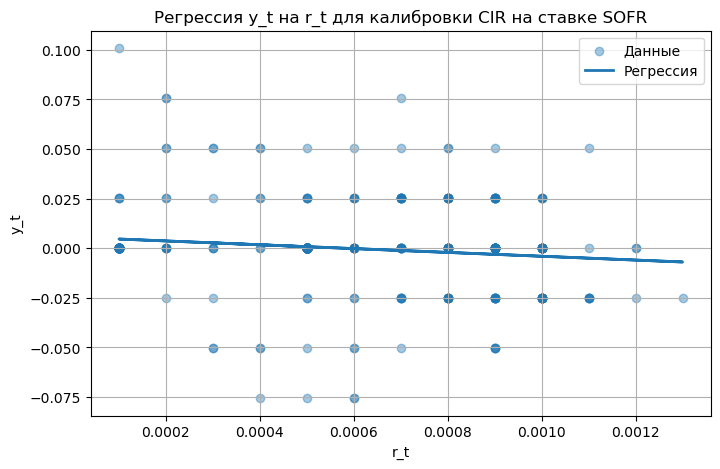

In [376]:
kappa_ruo, theta_ruo, sigma_ruo, r0_ruo = val_params_cir(ruonia, name='RUONIA', start_date='2020-05-01', end_date='2021-12-09', size = True)

kappa_sofr, theta_sofr, sigma_sofr, r0_sofr = val_params_cir(sofr, name='SOFR', start_date='2020-05-01', end_date='2021-12-09', size = True)

rho_RU, rho_RFX, rho_UFX  = eps_for_rho(ruonia,sofr,rub_usd, start_date='2020-05-01', end_date='2021-12-09')

sigma_rub_usd, S_0 = val_params_fx(rub_usd, start_date='2020-05-01', end_date='2021-12-09')

In [377]:
## уже знаем нужные нам параметры по каждой модели выше
# dates, r_R_paths, r_U_paths, S_paths = simulate_triple_model_by_dates(
#     start_date = '2021-12-10',
#     end_date = '2021-12-31',
#     kappa_R = kappa_ruo,
#     theta_R = theta_ruo,
#     sigma_R = sigma_ruo,
#     r0_R = r0_ruo,
#     kappa_U = kappa_sofr,
#     theta_U = theta_sofr,
#     sigma_U = sigma_sofr,
#     r0_U = r0_sofr,
#     sigma_FX = sigma_rub_usd,
#     S0 = S_0,
#     rho_RU = rho_RU,
#     rho_RFX = rho_RFX,
#     rho_UFX = rho_UFX,
#     n_paths= 10000
#     ,seed = True
# )

# ## не знаем параметров, на вход подаем только датафреймы
dates, r_R_paths, r_U_paths, S_paths = simulate_triple_model_by_dates(
    start_date = '2021-12-10',
    end_date = '2021-12-31',
    rub = ruonia, usd = sofr, fx = rub_usd,
    start_date_for_val = '2020-05-01', end_date_for_val = '2021-12-09',
    n_paths=10000,
    dt = 1/252,
    seed=None
)

In [378]:
print(dates.shape)
print(r_R_paths.shape)
print(r_U_paths.shape)
print(S_paths.shape)

(22,)
(22, 10000)
(22, 10000)
(22, 10000)


Значит строки - временные срезы, даты в нашем случае

Столбцы - симмулированные траектории

Оба варианта рабочие. Второй можно использовать если будем захотим посмотреть на другие индексы или за другие даты например

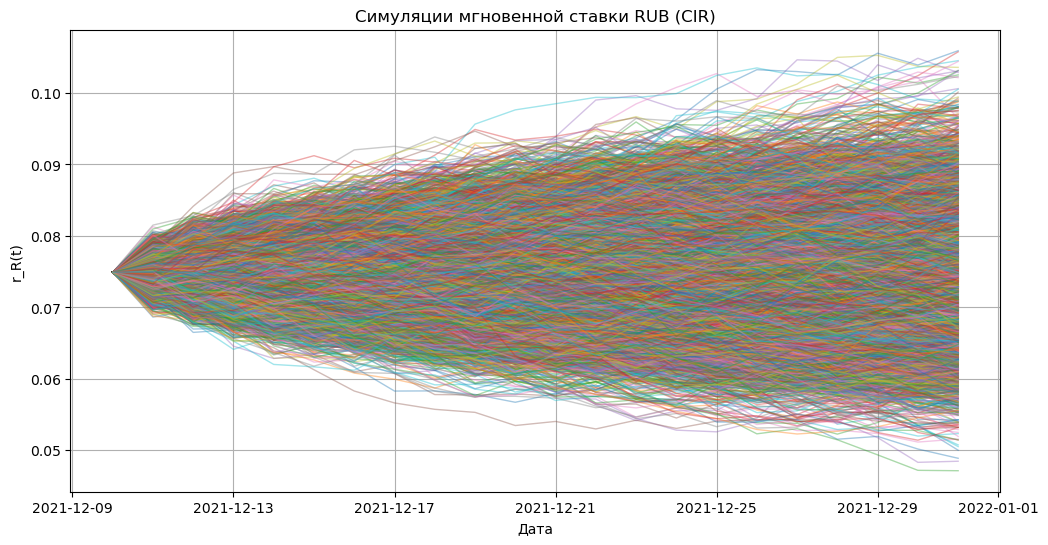

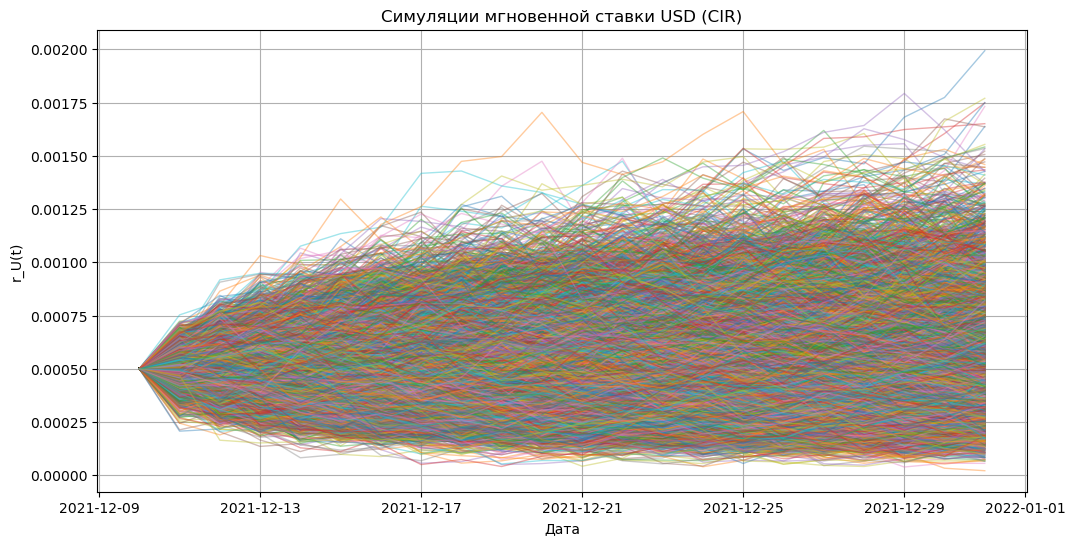

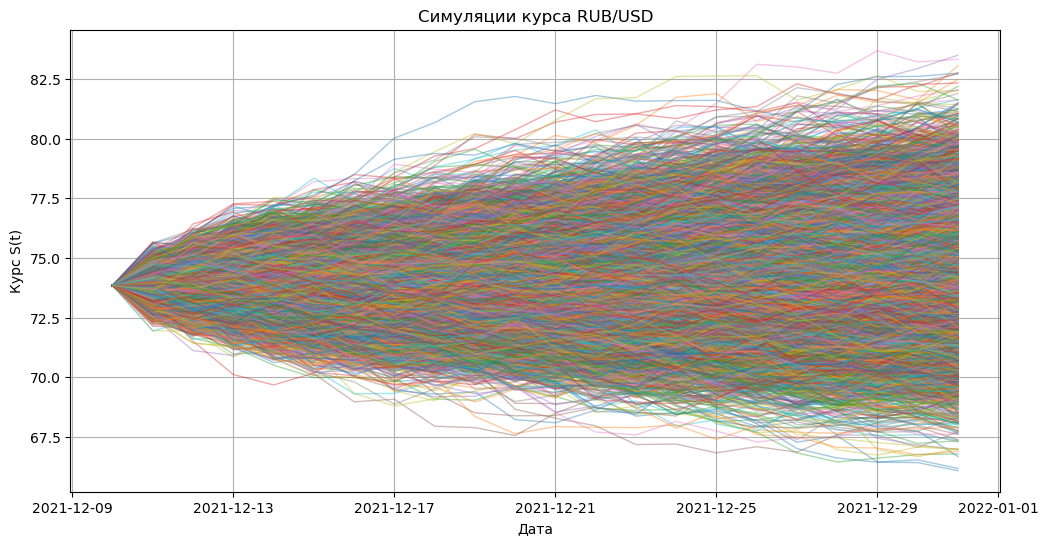

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i in range(r_R_paths.shape[1]):
    plt.plot(dates, r_R_paths[:, i], alpha=0.4, linewidth=1)

plt.title("Симуляции мгновенной ставки RUB (CIR)")
plt.xlabel("Дата")
plt.ylabel("r_R(t)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

for i in range(r_U_paths.shape[1]):
    plt.plot(dates, r_U_paths[:, i], alpha=0.4, linewidth=1)

plt.title("Симуляции мгновенной ставки USD (CIR)")
plt.xlabel("Дата")
plt.ylabel("r_U(t)")
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))


for i in range(S_paths.shape[1]):
    plt.plot(dates, S_paths[:, i], alpha=0.4, linewidth=1)

plt.title("Симуляции курса RUB/USD")
plt.xlabel("Дата")
plt.ylabel("Курс S(t)")
plt.grid(True)

plt.show()


### Определение оптимального кол-ва симмуляций
Для определения оптимального кол-во симмуляци, посмотрим на:

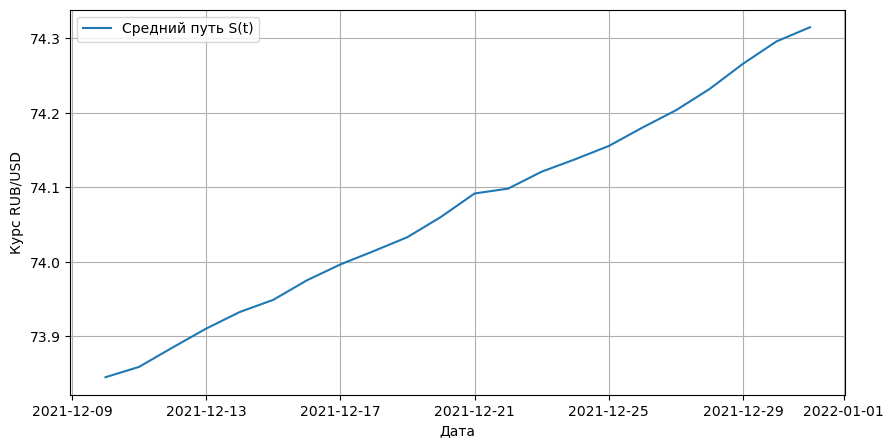

E[S_T]   = 74.31472450192484
Std[S_T] = 2.3988336474798793
5%  квантиль = 70.40766614688056
50% квантиль = 74.29912301487036
95% квантиль = 78.32818580901333


In [ ]:
S_mean_path = S_paths.mean(axis=1)  # среднее по всем симуляциям на каждый день

plt.figure(figsize=(10, 5))
plt.plot(dates, S_mean_path, label="Средний путь S(t)")
plt.xlabel("Дата")
plt.ylabel("Курс RUB/USD")
plt.grid(True)
plt.legend()
plt.show()

S_T = S_paths[-1, :]   # конечные значения по всем путям

S_T_mean = S_T.mean()
S_T_std  = S_T.std(ddof=1)
p5, p50, p95 = np.percentile(S_T, [5, 50, 95])

print("E[S_T]   =", S_T_mean)
print("Std[S_T] =", S_T_std)
print("5%  квантиль =", p5)
print("50% квантиль =", p50)
print("95% квантиль =", p95)



In [296]:
def fx_stat_for_n_paths(n_paths, seed = None):
    dates, r_R_paths, r_U_paths, S_paths = simulate_triple_model_by_dates(
        start_date='2021-12-10',
        end_date='2021-12-31',
        kappa_R=kappa_ruo,
        theta_R=theta_ruo,
        sigma_R=sigma_ruo,
        r0_R=r0_ruo,
        kappa_U=kappa_sofr,
        theta_U=theta_sofr,
        sigma_U=sigma_sofr,
        r0_U=r0_sofr,
        sigma_FX=sigma_rub_usd,
        S0=S_0,
        rho_RU=rho_RU,
        rho_RFX=rho_RFX,
        rho_UFX=rho_UFX,
        n_paths=n_paths
        , seed = seed
    )
    if seed is not None:
        np.random.seed(seed)
    S_T = S_paths[-1, :]
    mean_ST = S_T.mean()
    std_ST  = S_T.std(ddof=1)
    mc_error = std_ST / np.sqrt(n_paths)
    return mean_ST, mc_error


In [ ]:
n_list = [500, 1000, 2000, 5000, 10000, 20000, 30000, 40000]

prev_mean = None
prev_err  = None

for n in n_list:
    mean_ST, mc_err = fx_stat_for_n_paths(n, seed = None) 

    if prev_mean is None:
        print(
            f"n={n:6d}  "
            f"E[S_T]≈{mean_ST:.4f}  "
            f"MC_error≈{mc_err:.4f}  "
            f"(первый шаг)"
        )
    else:
        d_mean = mean_ST - prev_mean
        d_err  = mc_err - prev_err

        rel_d_mean = d_mean / prev_mean * 100
        rel_d_err  = d_err  / prev_err  * 100

        print(
            f"n={n:6d}  "
            f"E[S_T]≈{mean_ST:.4f}  "
            f"MC_error≈{mc_err:.4f}  "
            f"ΔE={d_mean:+.4f} ({rel_d_mean:+.3f}%)  "
            f"ΔMC_err={d_err:+.4f} ({rel_d_err:+.3f}%)"
        )

    prev_mean = mean_ST
    prev_err  = mc_err


n=   500  E[S_T]≈74.3496  MC_error≈0.1028  (первый шаг)
n=  1000  E[S_T]≈74.2044  MC_error≈0.0778  ΔE=-0.1451 (-0.195%)  ΔMC_err=-0.0250 (-24.352%)
n=  2000  E[S_T]≈74.3318  MC_error≈0.0522  ΔE=+0.1273 (+0.172%)  ΔMC_err=-0.0256 (-32.885%)
n=  5000  E[S_T]≈74.2784  MC_error≈0.0336  ΔE=-0.0534 (-0.072%)  ΔMC_err=-0.0186 (-35.546%)
n= 10000  E[S_T]≈74.3015  MC_error≈0.0239  ΔE=+0.0231 (+0.031%)  ΔMC_err=-0.0098 (-29.065%)
n= 20000  E[S_T]≈74.2906  MC_error≈0.0170  ΔE=-0.0109 (-0.015%)  ΔMC_err=-0.0069 (-28.758%)
n= 30000  E[S_T]≈74.3079  MC_error≈0.0139  ΔE=+0.0173 (+0.023%)  ΔMC_err=-0.0031 (-18.361%)
n= 40000  E[S_T]≈74.3097  MC_error≈0.0120  ΔE=+0.0018 (+0.002%)  ΔMC_err=-0.0018 (-13.221%)


Выглядит так, что после 10000 симмуляций, особой разницы по мат. ожидани и по ошибке => возьмем 10000 симмуляций

--------------
## Задача 2.1

**Range Accrual** — это разновидность процентного (или FX) дериватива, у которого купон зависит от того, _сколько дней базовый показатель находился внутри заданного диапазона значений_.
Это **процентная структура**, где вместо фиксированного купона ты получаешь:

$$
\text{Coupon} = \text{Notional} \times \text{Rate} \times 
\frac{N_{\text{in range}}}{N_{\text{total}}}
$$

где  

- N_in range — количество дней, когда ставка попала в диапазон  
- N_total — всего дней за купонный период  
- Rate - купонная ставка годовых, предполагаю, что в нашем случае 100%

Если ставка всегда была внутри диапазона → купон почти как обычный.  
Если была редко → купон почти нулевой.

-------------
## Задача 2.2

Напишем функцию, для подсчета цены продукта **Range Accrual** которая:
- на вход будет принимать
    - Дата начала действия контракта
    - Дата окончания действия контракта
    - Номинал сделки (максимальную выплату, доступную в случае нахождения внутри диапазона в течение всего срока жизни сделки)
    - Какой дериватив
    - Параметры для самих симмуляций
    - Верхняя граница диапазона (или ее отсутствие)
    - Нижняя граница диапазона (или ее отсутствие)
- на выход отдавать:
    - справедливую стоимость продукта


Зададим два варианта Параметров

In [422]:
# знаем только датафреймы с инфой по ставкам
params1 = {
    'rub': ruonia,
    'usd': sofr,
    'fx': rub_usd,
    'start_date_for_val': '2019-05-01',
    'end_date_for_val': '2021-12-09',
    'n_paths': 10000,
    'dt': 1/252,
    'seed': None
}

# уже все прогнали, все знаем
params2 = {
    'kappa_R': kappa_ruo,
    'theta_R': theta_ruo,
    'sigma_R': sigma_ruo,
    'r0_R': r0_ruo,

    'kappa_U': kappa_sofr,
    'theta_U': theta_sofr,
    'sigma_U': sigma_sofr,
    'r0_U': r0_sofr,

    'sigma_FX': sigma_rub_usd,
    'S0': S_0,

    'rho_RU': rho_RU,
    'rho_RFX': rho_RFX,
    'rho_UFX': rho_UFX,

    'n_paths': 10000,
    'seed': True
}



In [423]:
def pricing_range_accrual(
    start_date
    , end_date
    , params: dict
    , nominal
    , derivative = 'FX'
    , upper_limit = np.inf
    , lower_limit = -np.inf
):
    dates, r_R_paths, r_U_paths, S_paths = simulate_triple_model_by_dates(
        start_date=start_date,
        end_date=end_date,
        **params
    )

    if derivative == 'FX':
        paths = S_paths
    elif derivative == 'RUB':
        paths = r_R_paths
    elif derivative == 'USD':
        paths = r_U_paths
    
    M = paths.shape[1]
    pv_paths = np.zeros(M)

    for i in range(M):
        path = paths[:,i]
        in_range = (path >= lower_limit) & (path <= upper_limit)
        day_in_range_total = in_range.mean()
        coupon = nominal * day_in_range_total
        pv_paths[i] = coupon

    price = pv_paths.mean()
    print("Оценка цены range accrual:", round(price, 2))
    return price

In [428]:
pricing_range_accrual(
    start_date = '2021-12-10',
    end_date = '2021-12-31',
    params=params1
    , nominal=100000
    , derivative = 'FX'
    , upper_limit = 90
    , lower_limit = 70
)

Оценка цены range accrual: 97370.0


np.float64(97370.0)

In [414]:
pricing_range_accrual(
    start_date = '2021-12-10',
    end_date = '2021-12-31',
    params=params2
    , nominal=100000
    , derivative = 'FX'
    , upper_limit = 90
    , lower_limit = 70
)

Оценка цены range accrual: 98920.91


np.float64(98920.90909090909)

------------